In [ ]:
#hide
#default_exp ml
from nbdev.showdoc import show_doc
from IPython.display import HTML
%load_ext autoreload
%autoreload 2

# ml
>data processing and model training + analysis using machine learning

In [ ]:
#export
from glycowork.ml.model_training import *
#from glycowork.ml.models import *
#from glycowork.ml.processing import *
#from glycowork.ml.representation import *
from glycowork.ml.train_test_split import *
from glycowork.glycan_data.loader import df_species, df_glycan
import warnings
warnings.filterwarnings("ignore")

`ml` contains the code base to process glycan for machine learning, construct state-of-the-art machine learning models, train them, and analyze trained models + glycan reprsentations. It currently contains the following modules:

- `model_training` contains functions for training machine learning models
- `models` describes some examples for machine learning architectures applicable to glycans
- `processing` contains helper functions to prepare glycan data for model training
- `representation` can be used to analyze trained models and to obtain glycan representations
- `train_test_split` contains various data split functions to get appropriate training and test sets

# model_training
>contains functions for training machine learning models

In [ ]:
#hide
show_doc(EarlyStopping)

<h2 id="EarlyStopping" class="doc_header"><code>class</code> <code>EarlyStopping</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/model_training.py#L14" class="source_link" style="float:right">[source]</a></h2>

> <code>EarlyStopping</code>(**`patience`**=*`7`*, **`verbose`**=*`False`*)

Early stops the training if validation loss doesn't improve after a given patience.

In [ ]:
#hide
show_doc(train_model)

<h4 id="train_model" class="doc_header"><code>train_model</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/model_training.py#L55" class="source_link" style="float:right">[source]</a></h4>

> <code>train_model</code>(**`model`**, **`dataloaders`**, **`criterion`**, **`optimizer`**, **`scheduler`**, **`num_epochs`**=*`25`*, **`patience`**=*`50`*, **`mode`**=*`'classification'`*)

model -- graph neural network (such as SweetNet) for analyzing glycans

dataloaders -- dictionary of dataloader objects with keys 'train' and 'val'

criterion -- PyTorch loss function

optimizer -- PyTorch optimizer

scheduler -- PyTorch learning rate decay

num_epochs -- number of epochs for training; default: 25

patience -- number of epochs without improvement until early stop; default: 50

mode -- 'classification' or 'regression'; default is binary classification


returns the best model seen during training

In [ ]:
#hide
show_doc(training_setup)

<h4 id="training_setup" class="doc_header"><code>training_setup</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/model_training.py#L169" class="source_link" style="float:right">[source]</a></h4>

> <code>training_setup</code>(**`model`**, **`epochs`**, **`lr`**, **`lr_decay_length`**=*`0.5`*, **`weight_decay`**=*`0.001`*, **`mode`**=*`'multiclass'`*)

prepares optimizer, learning rate scheduler, and loss criterion for model training

model -- graph neural network (such as SweetNet) for analyzing glycans

epochs -- number of epochs for training the model

lr -- learning rate

lr_decay_length -- proportion of epochs over which to decay the learning rate;default:0.5

weight_decay -- regularization parameter for the optimizer; default:0.001

mode -- 'multiclass': classification with multiple classes, 'binary':binary classification

        'regression': regression; default:'multiclass'


returns optimizer, learning rate scheduler, and loss criterion objects

In [ ]:
#hide
show_doc(train_ml_model)

<h4 id="train_ml_model" class="doc_header"><code>train_ml_model</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/model_training.py#L196" class="source_link" style="float:right">[source]</a></h4>

> <code>train_ml_model</code>(**`X_train`**, **`X_test`**, **`y_train`**, **`y_test`**, **`mode`**=*`'classification'`*, **`feature_calc`**=*`False`*, **`libr`**=*`None`*, **`return_features`**=*`False`*, **`feature_set`**=*`['known', 'exhaustive']`*)

wrapper function to train standard machine learning models on glycans

X_train, X_test -- either lists of glycans (needs feature_calc = True) or

                   motif dataframes such as from annotate_dataset

y_train, y_test -- lists of labels

mode -- 'classification' or 'regression'; default:'classification'

feature_calc -- set to True for calculating motifs from glycans; default:False

libr -- sorted list of unique glycoletters observed in the glycans of our data; default:lib

return_features -- whether to return calculated features; default:False

feature_set -- which feature set to use for annotations, add more to list to expand; default:['known','exhaustive']

             options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans)

                           and 'exhaustive' (all mono- and disaccharide features)


returns trained model                           

In [ ]:
plants = [1 if k == 'Plantae' else 0 for k in df_species.Kingdom.values.tolist()]
X_train, X_test, y_train, y_test = general_split(df_species.target.values.tolist(), plants)
model_ft, _, X_test = train_ml_model(X_train, X_test, y_train, y_test, feature_calc = True, feature_set = ['exhaustive'],
                         return_features = True)


Calculating Glycan Features...

Training model...
[06:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Evaluating model...
Accuracy of trained model on separate validation set: 0.9549583648750947


In [ ]:
#hide
show_doc(analyze_ml_model)

<h4 id="analyze_ml_model" class="doc_header"><code>analyze_ml_model</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/model_training.py#L252" class="source_link" style="float:right">[source]</a></h4>

> <code>analyze_ml_model</code>(**`model`**)

plots relevant features for model prediction

model -- trained machine learning model from train_ml_model

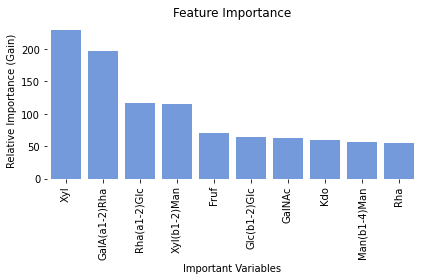

In [ ]:
analyze_ml_model(model_ft)

In [ ]:
#hide
show_doc(get_mismatch)

<h4 id="get_mismatch" class="doc_header"><code>get_mismatch</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/model_training.py#L271" class="source_link" style="float:right">[source]</a></h4>

> <code>get_mismatch</code>(**`model`**, **`X_test`**, **`y_test`**, **`n`**=*`10`*)

analyzes misclassifications of trained machine learning model

model -- trained machine learning model from train_ml_model

X_test -- motif dataframe used for validating model

y_test -- list of labels

n -- number of returned misclassifications; default:10


returns tuples of misclassifications and their predicted probability

In [ ]:
get_mismatch(model_ft, X_test, y_test)

[('Glc(b1-4)Glc(b1-6)Glc', 0.1811130940914154),
 ('Man(a1-2)Man(a1-2)Man(a1-6)[Man(a1-2)Man(a1-3)]Man(a1-3)[Man(a1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  0.18393604457378387),
 ('Glc(a1-6)Glc(a1-4)Glc(a1-4)[Glc(a1-6)]Glc(a1-4)Glc(a1-4)Glc',
  0.297215074300766),
 ('D-4dThrHexA4en(a1-2)Rha(a1-4)GlcA(a1-2)Rha', 0.32377585768699646),
 ('Glc(b1-3)[Glc(b1-4)]Glc', 0.31106945872306824),
 ('Gal(b1-3)Glc(b1-3)Rha(a1-4)[Gal(b1-3)]Glc(b1-3)Rha(a1-4)[Gal(b1-3)]Glc(b1-3)Rha-ol',
  0.548016369342804),
 ('Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  0.9153600931167603),
 ('Glc(a1-4)Glc(a1-4)Glc(a1-4)Glc', 0.297215074300766),
 ('GalOMe(b1-4)GalOMe(b1-4)Rha', 0.47244569659233093),
 ('Glc(a1-3)Rha(a1-4)Glc(b1-6)Glc', 0.3254348635673523)]

# models
>describes some examples for machine learning architectures applicable to glycans

In [ ]:
#requires torch_geometric
#show_doc(SweetNet)

In [ ]:
#requires torch_geometric
#show_doc(init_weights)

In [ ]:
#requires torch_geometric
#show_doc(prep_model)

# processing
>contains helper functions to prepare glycan data for model training

In [ ]:
#requires torch_geometric
#show_doc(dataset_to_graphs)

In [ ]:
#requires torch_geometric
#show_doc(dataset_to_dataloader)

In [ ]:
#requires torch_geometric
#show_doc(split_data_to_train)

# representation
>can be used to analyze trained models and to obtain glycan representations

In [ ]:
#requires torch_geometric
#show_doc(glycans_to_emb)

# train_test_split
>contains various data split functions to get appropriate training and test sets

In [ ]:
#hide
show_doc(hierarchy_filter)

<h4 id="hierarchy_filter" class="doc_header"><code>hierarchy_filter</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/train_test_split.py#L34" class="source_link" style="float:right">[source]</a></h4>

> <code>hierarchy_filter</code>(**`df_in`**, **`rank`**=*`'Domain'`*, **`min_seq`**=*`5`*, **`wildcard_seed`**=*`False`*, **`wildcard_list`**=*`None`*, **`wildcard_name`**=*`None`*, **`r`**=*`0.1`*, **`col`**=*`'target'`*)

stratified data split in train/test at the taxonomic level, removing duplicate glycans and infrequent classes

df_in -- dataframe of glycan sequences and taxonomic labels

rank -- which rank should be filtered; default is 'domain'

min_seq -- how many glycans need to be present in class to keep it; default is 5

wildcard_seed -- set to True if you want to seed wildcard glycoletters; default is False

wildcard_list -- list which glycoletters a wildcard encompasses

wildcard_name -- how the wildcard should be named in the IUPACcondensed nomenclature

r -- rate of replacement, default is 0.1 or 10%

col -- column name for glycan sequences; default: target


returns train_x, val_x (lists of glycans (strings) after stratified shuffle split)

train_y, val_y (lists of taxonomic labels (mapped integers))

id_val (taxonomic labels in text form (strings))

class_list (list of unique taxonomic classes (strings))

class_converter (dictionary to map mapped integers back to text labels)

In [ ]:
train_x, val_x, train_y, val_y, id_val, class_list, class_converter = hierarchy_filter(df_species,
                                                                                       rank = 'Kingdom')
print(train_x[:10])

['Glc(b1-2)GlcOOle(b1-4)Glc', 'Glc(a1-4)GalNAc(a1-3)LDManHepOCm(a1-3)LDManHep(a1-5)Kdo', 'GlcNAc(b1-3)Rha(a1-3)Rha(a1-2)4dEry-ol', 'Man(a1-6)Man(b1-4)GlcNAc(b1-4)GlcNAcN', '[Gal(b1-6)]Man(b1-4)[Gal(b1-2)]Man(b1-4)GlcA(b1-2)[Gal(b1-4)]GlcA(a1-3)Man', '[Fuc(a1-2)]Gal(a1-3)Gal(b1-3)GalNAc(b1-3)Gal', 'GlcNOOle(b1-2)GlcNAc(b1-4)GlcNAc(b1-4)GlcNAc(b1-4)GlcNAcOP', 'Man(a1-3)[Man(a1-6)]Man(a1-6)Man(b1-4)GlcNAc(b1-4)GlcNAc-ol', 'Glc(b1-4)[Rha(a1-2)][GalOP(a1-3)]Gal(b1-4)Glc(b1-4)Glc', 'LDManHep(a1-2)DDManHep(a1-2)GalA(a1-3)[LDManHep(a1-7)]LDManHep(a1-3)[Glc(b1-4)]LDManHep(a1-5)[AraN(b1-8)][Kdo(a2-4)]Kdo(a2-6)[AraOPN(b1-4)]GlcN(b1-6)[AraOPN(b1-1)]GlcN']


In [ ]:
#hide
show_doc(seed_wildcard_hierarchy)

<h4 id="seed_wildcard_hierarchy" class="doc_header"><code>seed_wildcard_hierarchy</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/train_test_split.py#L9" class="source_link" style="float:right">[source]</a></h4>

> <code>seed_wildcard_hierarchy</code>(**`glycans`**, **`labels`**, **`wildcard_list`**, **`wildcard_name`**, **`r`**=*`0.1`*)

adds dataframe rows in which glycan parts have been replaced with the appropriate wildcards

glycans -- list of IUPACcondensed glycan sequences (string)

labels -- list of labels used for prediction

wildcard_list -- list which glycoletters a wildcard encompasses

wildcard_name -- how the wildcard should be named in the IUPACcondensed nomenclature

r -- rate of replacement, default is 0.1 or 10%


returns list of glycans (strings) and labels (flexible) where some glycan parts have been replaced with wildcard_name

In [ ]:
train_x, val_x, train_y, val_y, id_val, class_list, class_converter = hierarchy_filter(df_species,
                                                                                       rank = 'Kingdom',
                                                                                       wildcard_seed = True,
                                                                                       wildcard_list = linkages,
                                                                                       wildcard_name = 'bond')
print(train_x[-10:])

['Glc(a1-3)Glc(bond)[Gal(b1-4)]Gal(b1-4)Gal(a1-2)Glc', 'GlcN(b1-7)LDManHep(a1-4)[LDManHep(bond)]LDManHep', 'Glc(a1-3)Glc(b1-4)Glc(b1-4)[GlcNAc(bond)LDManHepOPEtn(a1-3)]LDManHep(a1-5)[Kdo(a2-4)]Kdo', 'Rha(a1-2)Gal(bond)GlcOAc(bond)Rha(bond)Rha(a1-2)Gal(bond)GlcOAc(bond)Rha(bond)Rha(a1-2)Gal(bond)GlcOAc(bond)Rha', 'Glc(bond)Glc(bond)Glc(bond)Glc', '[Neu5Ac(bond)Gal(b1-4)GlcNAc(b1-3)]Gal(b1-3)Gal(b1-4)Glc(b1-6)Gal', '[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(bond)]Gal(bond)Gal(b1-4)Glc(b1-6)Gal', 'D-RhaNAc(bond)D-RhaNAc(a1-2)D-RhaNAc(bond)D-RhaNAc(bond)D-RhaNAc', 'GlcOSA(b1-3)Gal(b1-4)GlcNAc(bond)Man(a1-6)[GlcNAc(bond)Man(a1-3)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'GlcOSA(b1-3)Gal(bond)GlcNAc(b1-2)Man(a1-6)[GlcNAc(b1-2)Man(a1-3)][GlcNAc(bond)]Man(bond)GlcNAc(bond)[Fuc(a1-6)]GlcNAc']


In [ ]:
#hide
show_doc(general_split)

<h4 id="general_split" class="doc_header"><code>general_split</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/train_test_split.py#L97" class="source_link" style="float:right">[source]</a></h4>

> <code>general_split</code>(**`glycans`**, **`labels`**, **`test_size`**=*`0.2`*)

splits glycans and labels into train / test sets

glycans -- list of IUPACcondensed glycan sequences (string)

labels -- list of labels used for prediction

test_size -- % size of test set; default is 0.2 / 20%


returns X_train, X_test, y_train, y_test

In [ ]:
train_x, val_x, train_y, val_y = general_split(df_species.target.values.tolist(),
                                              df_species.Species.values.tolist())
print(train_x[:10])

['6dAltOAc(b1-2)6dAlt(b1-3)6dAlt(b1-2)6dAltOAc', 'Ara(a1-2)Ara(a1-6)GlcNAc', 'Neu5AcOS(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc', 'Gal(b1-3)Gal(a1-3)Gal', 'AraNMeOMe(b1-8)KoOMe(a2-4)KdoOMe', 'Man(a1-2)Man(a1-2)Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'GlcA(b1-6)Gal(b1-3)Ara', 'GalNAcOS(b1-4)GlcNAc(b1-2)Man(a1-3)[GalNAcOS(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'Rha(a1-6)Glc(a1-2)[Glc(a1-3)]Rha(a1-2)Rha(a1-2)Rha', 'Rha(a1-2)[Glc(b1-3)]Glc']


In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_core.ipynb.
Converted 01_alignment.ipynb.
Converted 02_glycan_data.ipynb.
Converted 03_ml.ipynb.
Converted 04_motif.ipynb.
Converted 05_examples.ipynb.
Converted index.ipynb.
